<a href="https://colab.research.google.com/github/TouficMad/TouficMad/blob/main/Data_Mining_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1 : Analyzing and Understanding Data**

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from google.colab import drive
import os

In [90]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:

file_path = '/content/drive/MyDrive/customer behaviour.csv'
customer_data = pd.read_csv(file_path)
print(customer_data.head())
customer_data.shape

    User ID  Gender  Age  EstimatedSalary  Spending Behavior Score
0  15624510    Male   19            19000                        6
1  15810944    Male   35            20000                        6
2  15668575  Female   26            43000                        9
3  15603246  Female   27            57000                        9
4  15804002    Male   19            76000                        5


(400, 5)

In [92]:
customer_data.info()
#check if there is a null and the data type


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  400 non-null    int64 
 1   Gender                   400 non-null    object
 2   Age                      400 non-null    int64 
 3   EstimatedSalary          400 non-null    int64 
 4   Spending Behavior Score  400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [94]:
summary=customer_data.describe()
pd.set_option('display.float_format', lambda x: '%.2f' % x)
summary

# count - The number of not-empty values.
# mean - The average (mean) value.
# std - The standard deviation.
# min - the minimum value.
# 25% - The 25% percentile*.
# 50% - The 50% percentile*.
# 75% - The 75% percentile*.
# max - the maximum value.

,User ID,Age,EstimatedSalary,Spending Behavior Score
count,400.00,400.00,400.00,400.00
mean,15691539.76,37.66,69742.50,5.42
std,71658.32,10.48,34096.96,2.78
min,15566689.00,18.00,15000.00,1.00
25%,15626763.75,29.75,43000.00,3.00
50%,15694341.50,37.00,70000.00,5.00
75%,15750363.00,46.00,88000.00,7.25
max,15815236.00,60.00,150000.00,10.00


**Analysis of Gender**

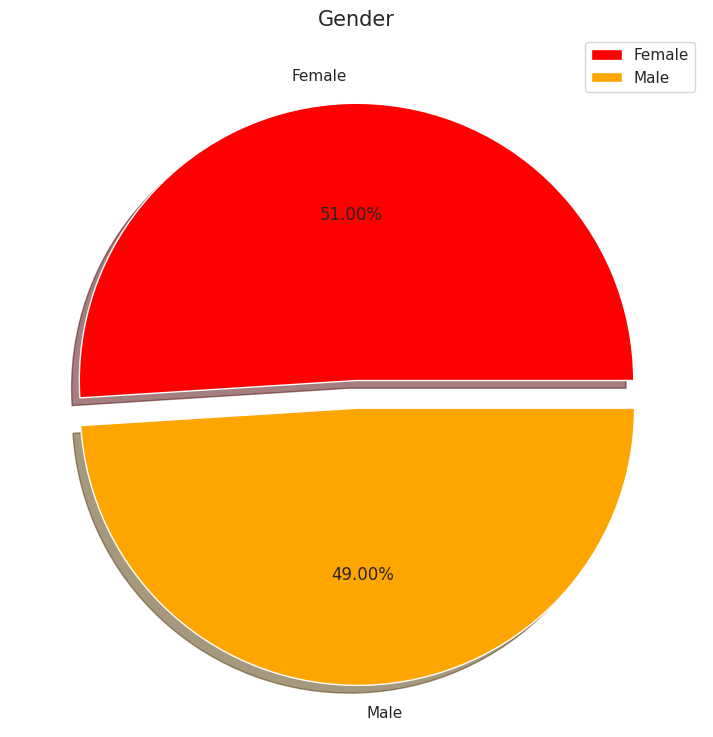

In [95]:
labels = ['Female', 'Male']
size = customer_data['Gender'].value_counts()
colors = ['red', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

**Analysis of customer age**

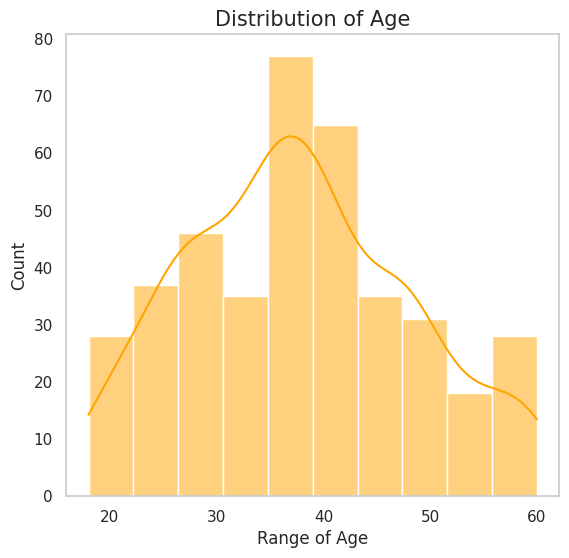

In [96]:

# Set figure size
plt.rcParams['figure.figsize'] = (14, 6)
# Create a subplot
plt.subplot(1, 2, 2)
# Set Seaborn style
sns.set(style='whitegrid')
# Use histplot instead of distplot
sns.histplot(customer_data['Age'], color='orange', kde=True)  # kde=True adds a kernel density estimate
plt.title('Distribution of Age', fontsize=15)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.grid(False)
plt.show()

**Analysis of Estimated Salary**

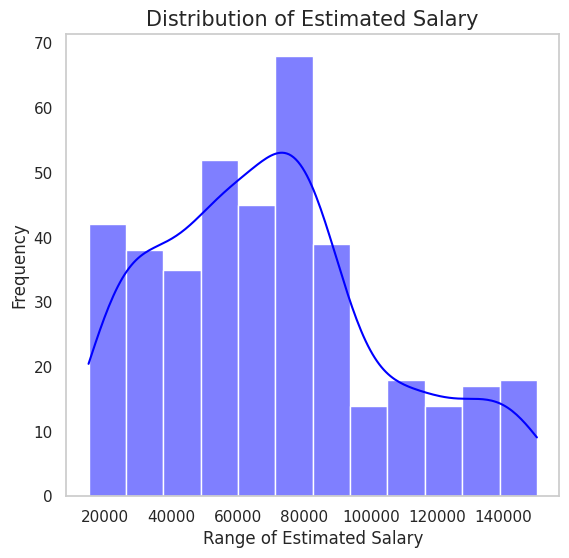

In [97]:
# Set figure size
plt.rcParams['figure.figsize'] = (14, 6)

# Create a subplot
plt.subplot(1, 2, 1)

# Set Seaborn style
sns.set(style='whitegrid')

# Use histplot instead of distplot
sns.histplot(customer_data['EstimatedSalary'], color='blue', kde=True)  # kde=True adds a kernel density estimate
plt.title('Distribution of Estimated Salary', fontsize=15)
plt.xlabel('Range of Estimated Salary')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

**Analysis of Spending Behavior Score**


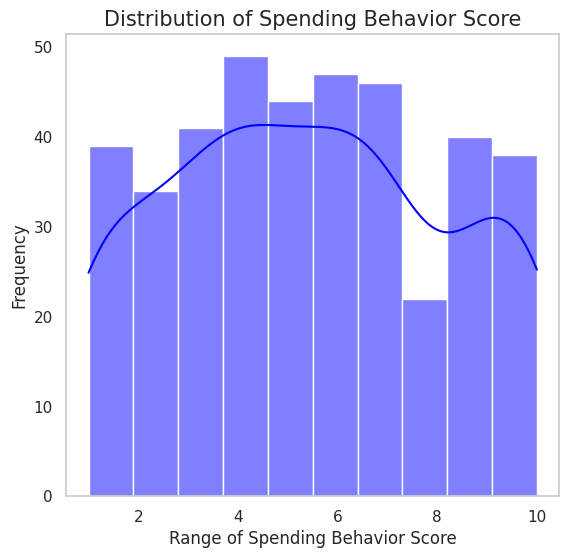

In [98]:
# Set figure size
plt.rcParams['figure.figsize'] = (14, 6)

# Create a subplot
plt.subplot(1, 2, 2)

# Set Seaborn style
sns.set(style='whitegrid')

# Use histplot instead of distplot
sns.histplot(customer_data['Spending Behavior Score'], color='blue', kde=True)  # kde=True adds a kernel density estimate
plt.title('Distribution of Spending Behavior Score', fontsize=15)
plt.xlabel('Range of Spending Behavior Score')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

**Step 2: Data Preprocessing**

Normalizing the variables is necessary to ensure uniform contributions from all variables to a scale when aggregating items or interpreting the results of analyses like regression. The primary objective of standardization is to unify all features onto a consistent scale while preserving the inherent differences in the value ranges.

In [99]:
col_names = ['EstimatedSalary', 'Age', 'Spending Behavior Score']
features = customer_data[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,EstimatedSalary,Age,Spending Behavior Score
0,-1.49,-1.78,0.21
1,-1.46,-0.25,0.21
2,-0.79,-1.11,1.29
3,-0.37,-1.02,1.29
4,0.18,-1.78,-0.15


Preprocessing categorical features is a crucial step in preparing data for analysis or machine learning models.


In [100]:
gender = customer_data['Gender']
newdf = scaled_features.join(gender)

newdf = pd.get_dummies(newdf, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

newdf = newdf.drop(['Gender_Male'],axis=1)

newdf.head()

,EstimatedSalary,Age,Spending Behavior Score,Gender_Female
0,-1.49,-1.78,0.21,0
1,-1.46,-0.25,0.21,0
2,-0.79,-1.11,1.29,1
3,-0.37,-1.02,1.29,1
4,0.18,-1.78,-0.15,0


**Step 3: Building the clustering model**

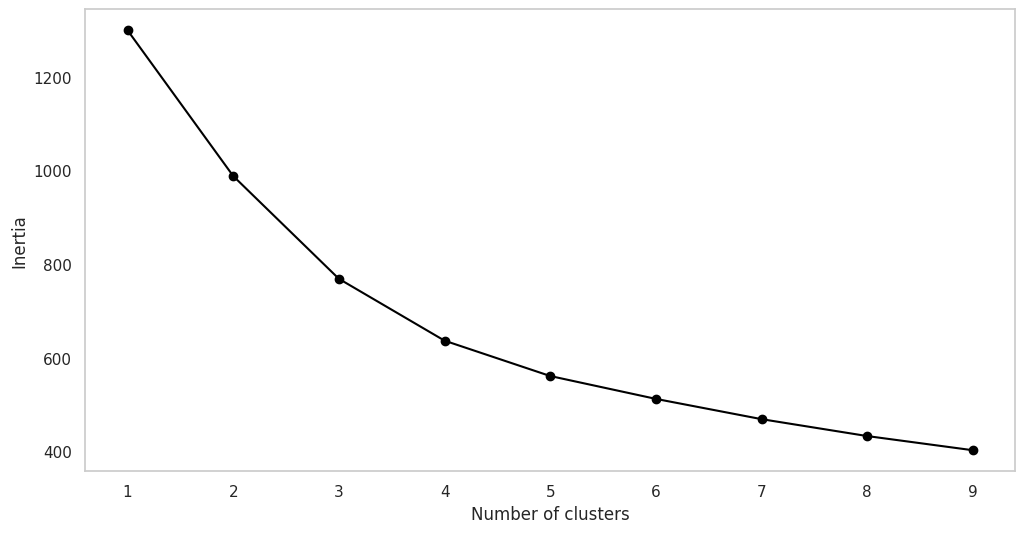

In [103]:
SSE = []

for cluster in range(1, 10):
    kmeans = KMeans(n_clusters=cluster, init='k-means++', n_init=10)  # Set n_init explicitly

    kmeans.fit(newdf)
    SSE.append(kmeans.inertia_)

frame = pd.DataFrame({'Cluster': range(1, 10), 'SSE': SSE})
plt.figure(figsize=(12, 6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o', color='black')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(False)

We can see that the optimal number of clusters is 4.

Silhouette coefficient A silhouette coefficient, or a silhouette score is a metric used to evaluate the quality of clusters created by the algorithm. Lets calculate the silhouette score of the model we just built:

In [107]:
# Build a model with 4 clusters, explicitly set n_init
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10)
kmeans.fit(newdf)

# Print the silhouette score of this model
sil_score = silhouette_score(newdf, kmeans.labels_, metric='euclidean')
print(f"Silhouette Score for 4 clusters: {sil_score}")


Silhouette Score for 4 clusters: 0.24708497174800167


The Silhouette score of this model is about 0.247 .

The Silhouette Score ranges from -1 to 1, where a higher score indicates better-defined clusters.

Visualizing the clusters for the first model we created to check how well the model is doing

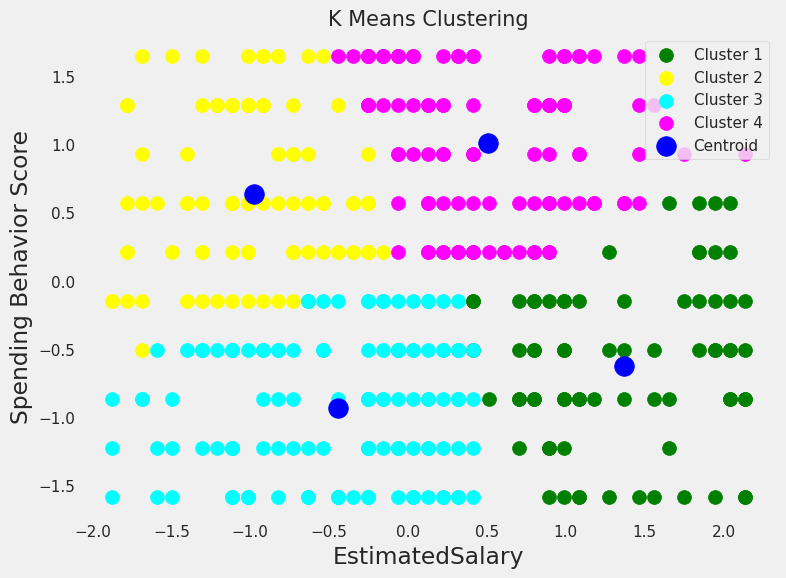

In [111]:
# Extracting features from the DataFrame
x = newdf.iloc[:, 1:].values

# Applying KMeans with 4 clusters
km = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=10)
y_means = km.fit_predict(x)

# Set a smaller figure size
plt.figure(figsize=(8, 6))

# Scatter plot for each cluster
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c='green', label='Cluster 1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c='yellow', label='Cluster 2')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s=100, c='cyan', label='Cluster 3')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s=100, c='magenta', label='Cluster 4')

# Scatter plot for centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=200, c='blue', label='Centroid')

# Plot styling and details
plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize=15)
plt.xlabel('Estimated Salary')
plt.ylabel('Spending Behavior Score')
plt.grid(False)
plt.legend()
plt.show()


From the above diagram, we can see that cluster separation isn't too great.

**Building clustering model 2 Feature selection using Principal Component Analysis**



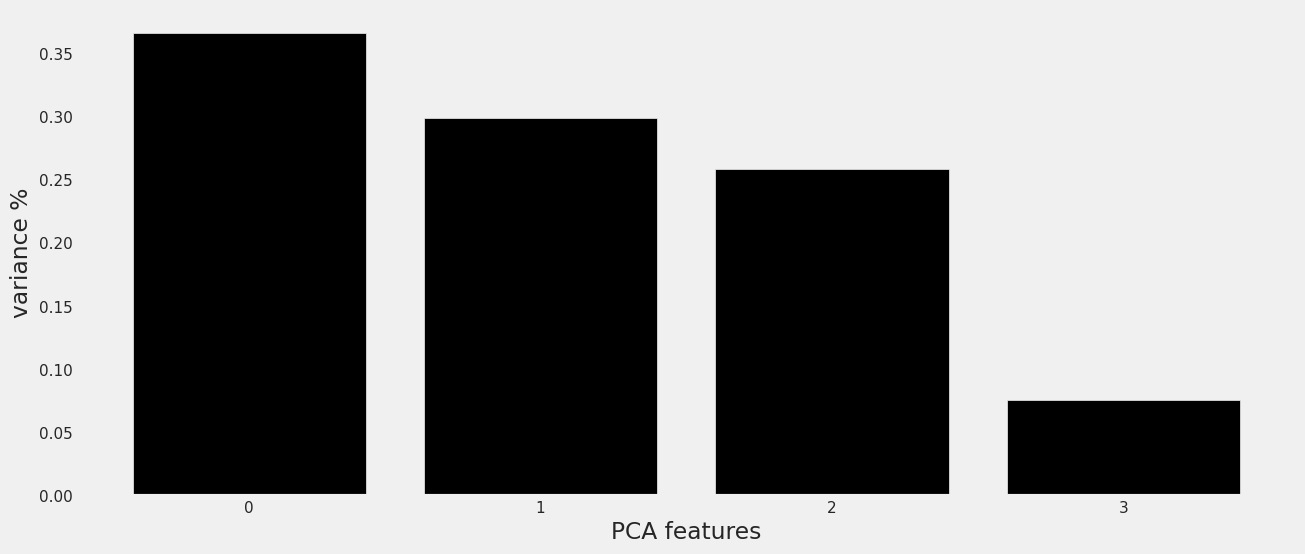

In [112]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(newdf)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.grid(False)
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

Based on this visualization, we can see that the first two PCA components explain around 70% of the dataset variance. We can feed these two components into the model.



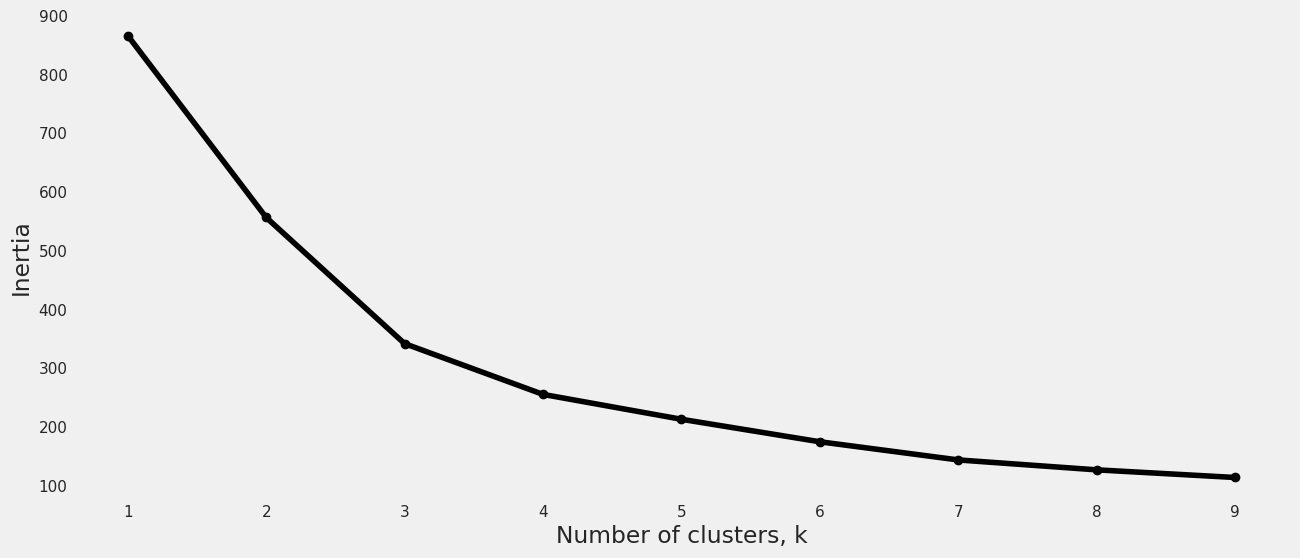

In [114]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, n_init=10)  # Set n_init explicitly
    model.fit(PCA_components.iloc[:, :2])
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.grid(False)
plt.xticks(ks)
plt.show()


Again, it looks like the optimal number of clusters is 3. We can calculate the silhouette score for this model with 3 clusters:



In [116]:
model = KMeans(n_clusters=3, n_init=10)  # Set n_init explicitly
model.fit(PCA_components.iloc[:, :2])

# Silhouette Score
sil_score = silhouette_score(PCA_components.iloc[:, :2], model.labels_, metric='euclidean')
print(f"Silhouette Score for 3 clusters: {sil_score}")


Silhouette Score for 3 clusters: 0.38579656805474344


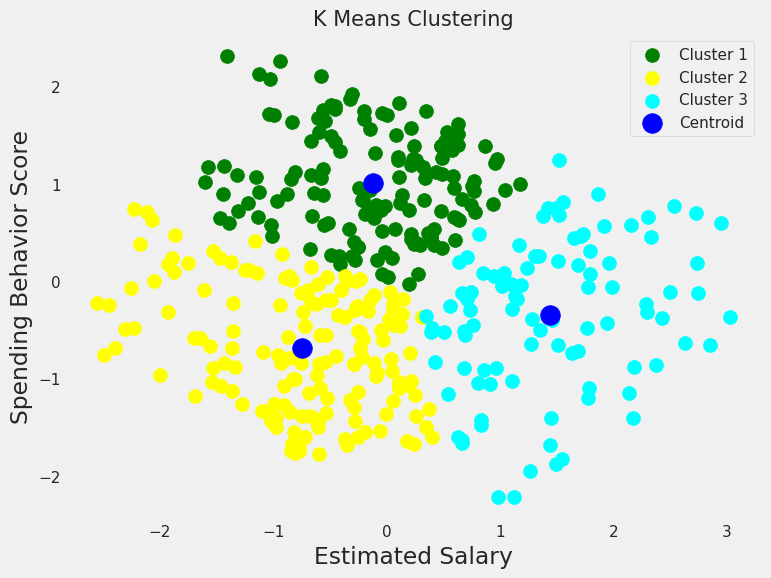

In [118]:
x = PCA_components.iloc[:, :2].values
km = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)

# Set a smaller figure size
plt.figure(figsize=(8, 6))

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c='green', label='Cluster 1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c='yellow', label='Cluster 2')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s=100, c='cyan', label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=200, c='blue', label='Centroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize=15)
plt.xlabel('Estimated Salary')
plt.ylabel('Spending Behavior Score')
plt.grid(False)
plt.legend()
plt.show()
